In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt




In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [6]:
#First just group all sales together, and just compare the two stores, for all products per month.
df['month'] = df['date'].apply(lambda x: x[0:7])
df.head()

,row_id,date,country,store,product,num_sold,month
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015-01
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015-01
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015-01
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015-01
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015-01


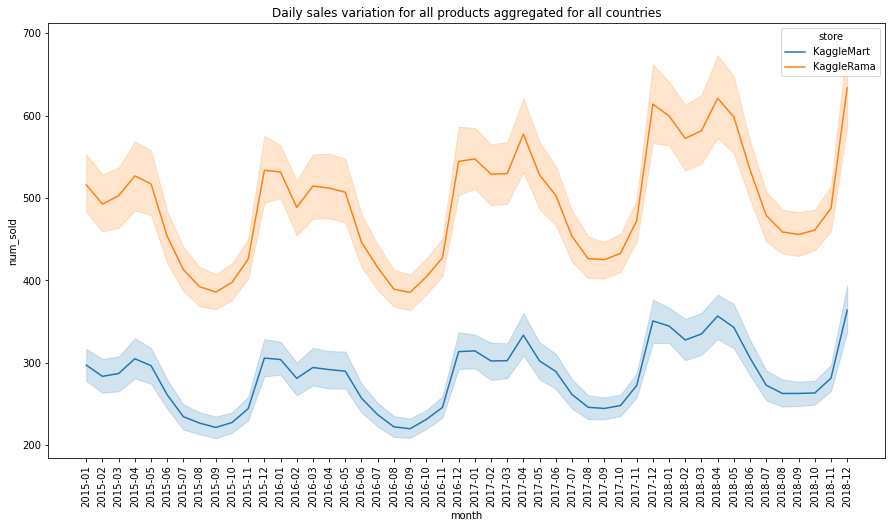

In [13]:
fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df, x='month', y='num_sold', hue='store')
# plt.setp(ax.get_majorticklabels(), rotation=90)
ax.set_title('Daily sales variation for all products aggregated for all countries')
ax.set_xticks(ax.get_xticks(),rotation = 30)
plt.xticks(rotation=90)
print()



In [14]:
#Let's group the data by month. And then we will compare the two stores, in different country, for each product.
monthly_df = pd.DataFrame(df.groupby(['month', 'country', 'store', 'product']).sum('num_sold')['num_sold'])
monthly_df = monthly_df.reset_index()
monthly_df.head()

,month,country,store,product,num_sold
0,2015-01,Finland,KaggleMart,Kaggle Hat,11396
1,2015-01,Finland,KaggleMart,Kaggle Mug,6857
2,2015-01,Finland,KaggleMart,Kaggle Sticker,3010
3,2015-01,Finland,KaggleRama,Kaggle Hat,19343
4,2015-01,Finland,KaggleRama,Kaggle Mug,12056


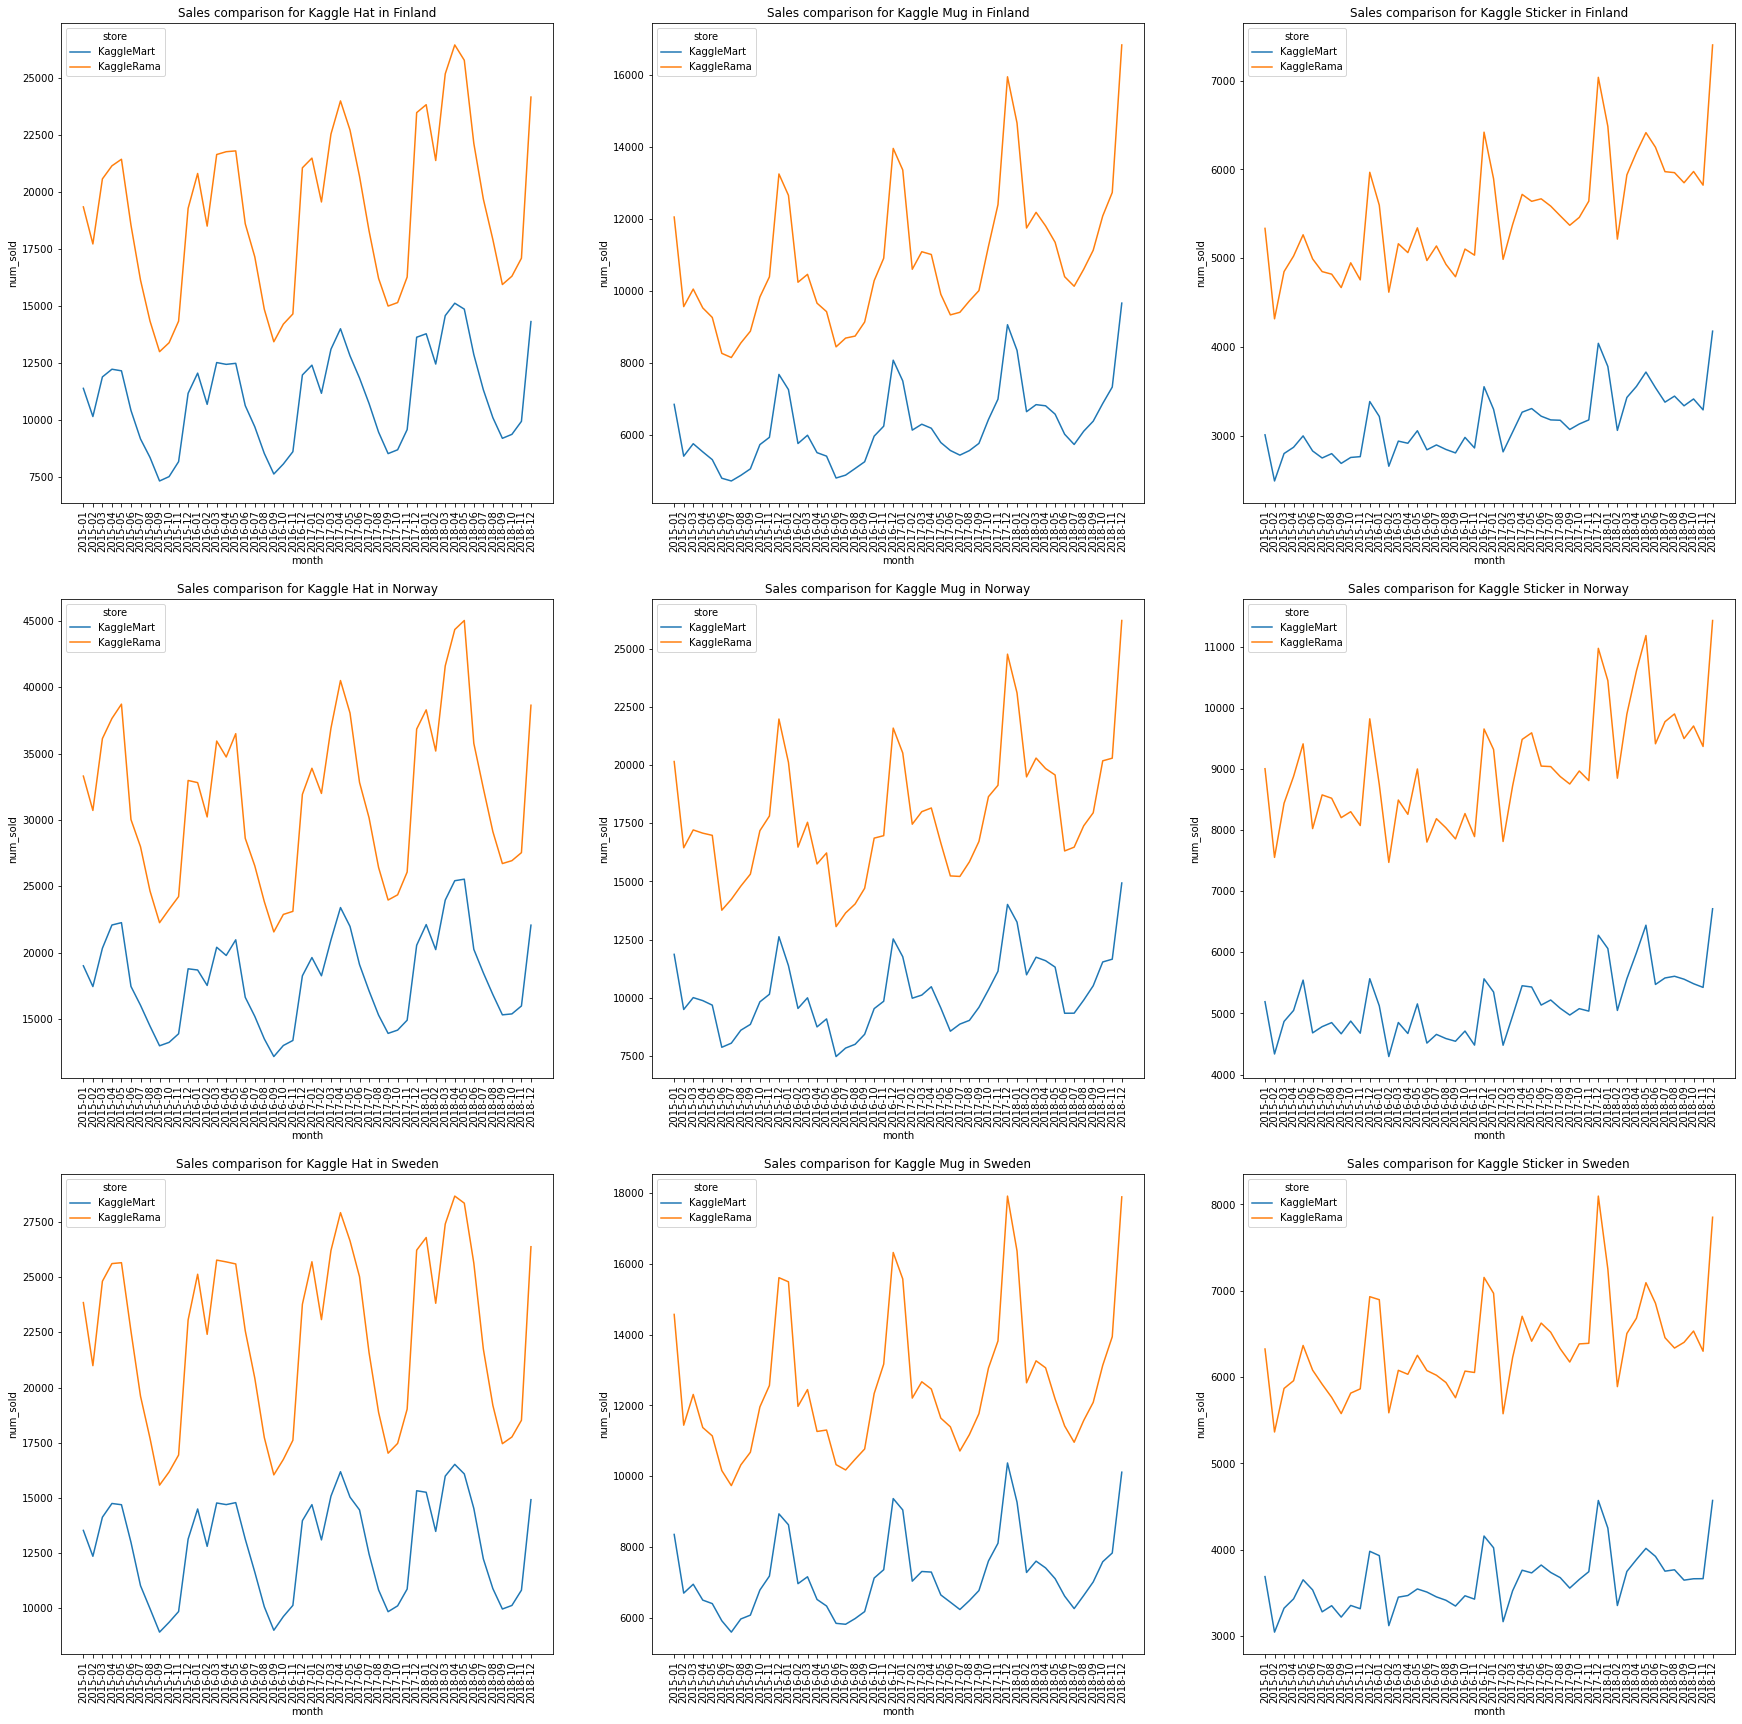

In [18]:
productList = monthly_df['product'].unique()
countryList = monthly_df['country'].unique()

fig, axes = plt.subplots(len(countryList), len(productList), figsize=(30,30))
for countryIndex in range(0, len(countryList)):
    for productIndex in range(0, len(productList)):
        currAx = axes[countryIndex, productIndex]
        sns.lineplot(ax=currAx, data=monthly_df[(monthly_df['country'] == countryList[countryIndex]) &
                                                (monthly_df['product'] == productList[productIndex])], x='month', y='num_sold', hue='store')
        currAx.set_title('Sales comparison for ' + productList[productIndex] + ' in ' + countryList[countryIndex])
        plt.setp(currAx.get_xticklabels(), rotation=90)

In [19]:
df.groupby(['country', 'product', 'store'])['date'].size()

country  product         store     
Finland  Kaggle Hat      KaggleMart    1461
                         KaggleRama    1461
         Kaggle Mug      KaggleMart    1461
                         KaggleRama    1461
         Kaggle Sticker  KaggleMart    1461
                         KaggleRama    1461
Norway   Kaggle Hat      KaggleMart    1461
                         KaggleRama    1461
         Kaggle Mug      KaggleMart    1461
                         KaggleRama    1461
         Kaggle Sticker  KaggleMart    1461
                         KaggleRama    1461
Sweden   Kaggle Hat      KaggleMart    1461
                         KaggleRama    1461
         Kaggle Mug      KaggleMart    1461
                         KaggleRama    1461
         Kaggle Sticker  KaggleMart    1461
                         KaggleRama    1461
Name: date, dtype: int64

In [20]:
print("Min date: ", df['date'].min())
print("Max date: ", df['date'].max())

Min date:  2015-01-01
Max date:  2018-12-31


In [21]:
365 * 4

1460